In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

from utils import *
from fastai2.imports import *
from fastai2.vision.all import *
from fastai2.vision.widgets import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Flower Classification
## Dataset 
    kaggle datasets download -d ianmoone0617/flower-goggle-tpu-classification

# DataBlock Questionnaire
* What are the types of our inputs and targets? Images and multiple labels.

Images and multiple class

* Where is the data? In a dataframe.

Images ara in folder and the tags in a dataframe.

* How do we know if a sample is in the training or the validation set? 

A column of our dataframe.

* How do we get an image? 

By looking at the column id.
* How do we know the label of an image? 

By looking at the column flower_cls.
* Do we want to apply a function to a given sample? 

Yes, we need to resize everything to a given size.

* Do we want to apply a function to a batch after it's created? 

No

In [21]:
df

,id,flower_cls
0,7486,cape flower
1,9454,cape flower
2,6974,cape flower
3,4739,cape flower
4,8783,cape flower
...,...,...
16460,13384,windflower
16461,16462,windflower
16462,13493,windflower
16463,15576,windflower


In [22]:
df = pd.read_csv("../storage/data/flower/flowers_idx.csv")
label = pd.read_csv("../storage/data/flower/flowers_label.csv")

In [23]:
df.head()

,id,flower_cls
0,7486,cape flower
1,9454,cape flower
2,6974,cape flower
3,4739,cape flower
4,8783,cape flower


In [24]:
label.head()

,label,flower_class
0,0,pink primrose
1,1,hard-leaved pocket orchid
2,2,canterbury bells
3,3,sweet pea
4,4,wild geranium


In [59]:
len(get_image_files(path_test))/(len(get_image_files(path))+ len(get_image_files(path_test)))

1.0

In [38]:
path = Path('../storage/data/flower/flower_tpu/flower_tpu/flowers_google/flowers_google/')
path_test = Path('../storage/data/flower/flower_tpu/flower_tpu/test/test/')

In [46]:
item_tfms = [Resize(224, method='crop')]
batch_tfms=[*aug_transforms(size=256), Normalize.from_stats(*imagenet_stats)]

In [47]:
dblock = DataBlock(
  blocks=(ImageBlock, CategoryBlock),
  get_x=ColReader('id', pref=path, suff='.jpeg'), 
  splitter=RandomSplitter(valid_pct=0.3, seed=42),
  get_y=ColReader('flower_cls'),
  item_tfms=item_tfms,
  batch_tfms=batch_tfms  
)

dls = dblock.dataloaders(df, bs=32 )   # Create the dataloaders

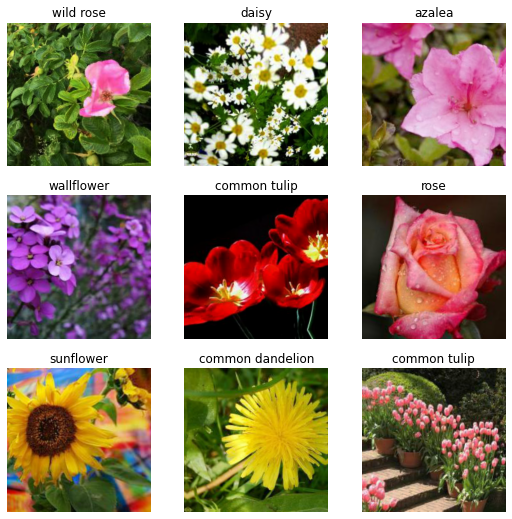

In [49]:
dls.show_batch()

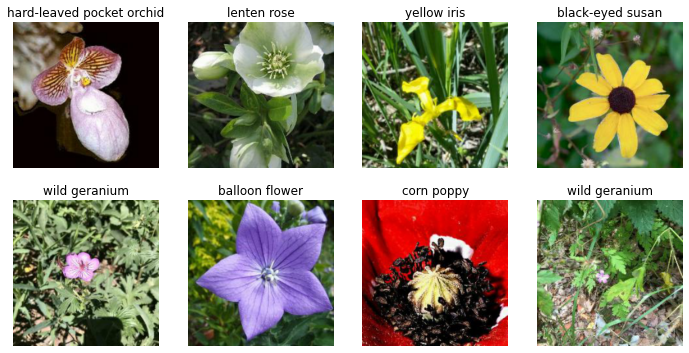

In [51]:
dls.valid.show_batch(max_n=8, nrows=2)

In [52]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.967566,1.180590,0.299453,01:19


epoch,train_loss,valid_loss,error_rate,time
0,1.135666,0.752502,0.192549,01:44
1,0.795827,0.596931,0.154282,01:44
2,0.523477,0.499926,0.125734,01:44
3,0.318366,0.477091,0.120672,01:43


In [53]:
interp = ClassificationInterpretation.from_learner(learn)

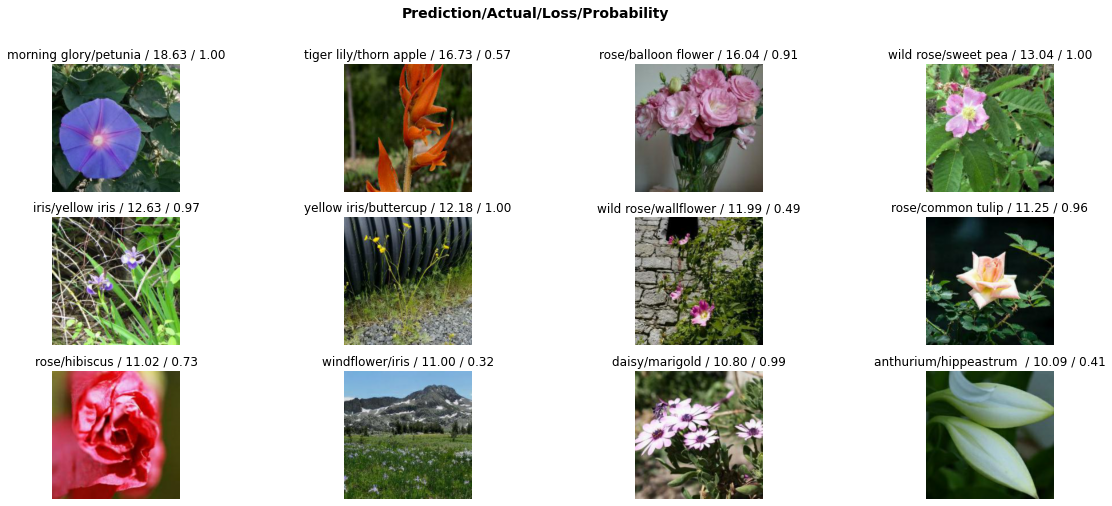

In [54]:
interp.plot_top_losses(12,figsize=(20,8))

In [55]:
interp.most_confused(min_val=3)

[('wild geranium', 'pink primrose', 9),
 ('wild rose', 'morning glory', 8),
 ('common tulip', 'rose', 7),
 ('camellia', 'rose', 6),
 ('wild geranium', 'wild rose', 6),
 ('bougainvillea', 'rose', 5),
 ('daffodil', 'yellow iris', 5),
 ('morning glory', 'wild rose', 5),
 ('sunflower', 'black-eyed susan', 5),
 ('wild rose', 'windflower', 5),
 ('azalea', 'bougainvillea', 4),
 ('common dandelion', 'daisy', 4),
 ('common tulip', 'sunflower', 4),
 ('rose', 'common tulip', 4),
 ('water lily', 'lotus', 4),
 ('wild pansy', 'buttercup', 4),
 ('black-eyed susan', 'sunflower', 3),
 ('buttercup', 'common dandelion', 3),
 ('buttercup', 'wild rose', 3),
 ('camellia', 'wild rose', 3),
 ('carnation', 'rose', 3),
 ('cyclamen ', 'magnolia', 3),
 ('daisy', 'common dandelion', 3),
 ('frangipani', 'magnolia', 3),
 ('gazania', 'sunflower', 3),
 ('globe thistle', 'common dandelion', 3),
 ('globe-flower', 'buttercup', 3),
 ('iris', 'morning glory', 3),
 ('iris', 'windflower', 3),
 ('mallow', 'camellia', 3),
 ('m

# Turning your model into an online app
## Using the model for inference

In [56]:
learn.export()

In [57]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [58]:
learn_inf = load_learner(path/'export.pkl')

In [60]:
test_img_list = get_image_files(path_test)

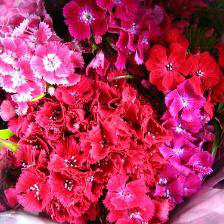

In [66]:
im = Image.open(test_img_list[0])
im.to_thumb(256,256)

In [63]:
learn_inf.predict(test_img_list[1])

('toad lily',
 tensor(92),
 tensor([1.1346e-06, 2.0991e-07, 7.7048e-08, 2.0854e-07, 7.1112e-08, 5.2445e-08,
         5.5933e-07, 3.1432e-08, 7.0100e-07, 1.0081e-07, 1.2616e-04, 2.1620e-07,
         1.1260e-07, 2.6607e-07, 2.5598e-07, 1.8146e-08, 1.5145e-08, 4.4993e-07,
         8.0585e-08, 8.3914e-08, 6.1743e-08, 2.1197e-07, 5.3530e-07, 7.6732e-08,
         2.5645e-07, 2.1240e-06, 3.2158e-08, 2.1927e-07, 1.5169e-07, 2.8973e-07,
         8.3504e-09, 2.8897e-09, 4.4938e-06, 1.6616e-07, 1.4433e-07, 1.9987e-04,
         7.4464e-07, 4.4324e-06, 4.8703e-08, 4.8696e-07, 3.4843e-07, 5.4130e-09,
         1.9775e-07, 6.8133e-07, 1.3317e-08, 8.1545e-05, 6.3430e-07, 1.3664e-06,
         6.6107e-07, 6.3145e-07, 2.4620e-07, 3.6289e-07, 6.0431e-09, 2.0697e-07,
         2.2835e-08, 1.1680e-06, 5.5113e-08, 4.0811e-08, 7.0486e-07, 2.3736e-08,
         9.6926e-09, 2.0613e-05, 1.6898e-06, 4.1086e-07, 1.0292e-07, 6.2436e-07,
         8.4376e-08, 3.6737e-08, 1.7084e-08, 4.4002e-06, 2.1591e-09, 7.1739e-09,
 

In [74]:
pd.DataFrame(learn_inf.dls.vocab)

,0
0,alpine sea holly
1,anthurium
2,artichoke
3,azalea
4,balloon flower
...,...
99,wild geranium
100,wild pansy
101,wild rose
102,windflower


## Creating a Notebook app from the model

In [75]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [82]:
btn_upload = SimpleNamespace(data = ['wild_pansy_close_up.jpg'])

In [92]:
img = PILImage.create(btn_upload.data[-1])

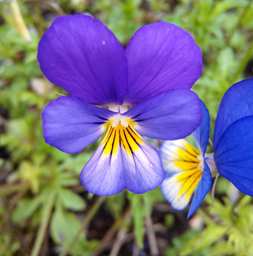

In [94]:
img.to_thumb(256,256)

In [86]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [87]:
pred,pred_idx,probs = learn_inf.predict(img)

In [89]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: wild pansy; Probability: 0.9999')

In [90]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [91]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [95]:
btn_upload = widgets.FileUpload()

In [97]:
VBox([widgets.Label('Select your flower!'), 
      btn_upload, btn_run, out_pl, lbl_pred])